In [1]:
%matplotlib inline


# One-sided selection


An illustration of the one-sided selection method.




Automatically created module for IPython interactive environment


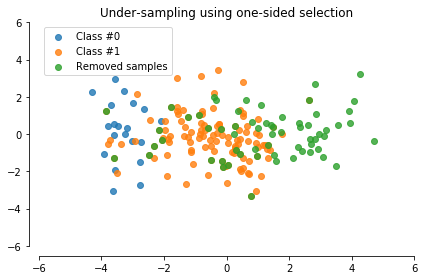

In [2]:
# Authors: Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import OneSidedSelection

print(__doc__)

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply One-Sided Selection
oss = OneSidedSelection(return_indices=True)
X_resampled, y_resampled, idx_resampled = oss.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

plt.title('Under-sampling using one-sided selection')
plt.legend()
plt.tight_layout()
plt.show()